In [2]:
from glob import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
import json
import pandas as pd

In [3]:
imgs = glob("./Test_query_web/static/Photos/*.jpg")
print(len(imgs))

105185


In [11]:
print(imgs[0].split('/')[-1].split('\\')[-1].split('.')[0])

0000253ea4ecbf19


Extract images histogram

In [9]:
def get_vector(iiaii, bins=32):
    red = cv2.calcHist(
        [cv2_img], [2], None, [bins], [0, 256]
    )
    green = cv2.calcHist(
        [cv2_img], [1], None, [bins], [0, 256]
    )
    blue = cv2.calcHist(
        [cv2_img], [0], None, [bins], [0, 256]
    )
    vector = np.concatenate([red, green, blue], axis=0)
    vector = vector.reshape(-1)
    return vector

In [30]:
def get_dict(image, bins=32):
    cv2_img = cv2.imread(image)
    red = cv2.calcHist(
        [cv2_img], [2], None, [bins], [0, 256]
    )
    green = cv2.calcHist(
        [cv2_img], [1], None, [bins], [0, 256]
    )
    blue = cv2.calcHist(
        [cv2_img], [0], None, [bins], [0, 256]
    )
    dict = {
        "R" : red.tolist(),
        "G" : green.tolist(),
        "B" : blue.tolist()
    }
    return dict

In [7]:
def dict_to_vector(hist_list):
    red = np.array(hist_list["R"], dtype=float)
    green = np.array(hist_list["G"], dtype=float)
    blue = np.array(hist_list["B"], dtype=float)
    vector = np.concatenate([red, green, blue], axis=0)
    vector = vector.reshape(-1)
    return vector

In [39]:
img_vector = get_dict(imgs[0])
print(img_vector)

{'R': [[16218.0], [81872.0], [102812.0], [87187.0], [68959.0], [48212.0], [30968.0], [20341.0], [13956.0], [10808.0], [8943.0], [7782.0], [7143.0], [6687.0], [6091.0], [5837.0], [5554.0], [5662.0], [5594.0], [5553.0], [5727.0], [5846.0], [6036.0], [6352.0], [6948.0], [7575.0], [8382.0], [10874.0], [15664.0], [19988.0], [30502.0], [116359.0]], 'G': [[15489.0], [62008.0], [87836.0], [76381.0], [71294.0], [53350.0], [38654.0], [27393.0], [19388.0], [14189.0], [11656.0], [9716.0], [8669.0], [7725.0], [7012.0], [6599.0], [6167.0], [6079.0], [5800.0], [5802.0], [5824.0], [5876.0], [6031.0], [6337.0], [6765.0], [7456.0], [8077.0], [9153.0], [11139.0], [16531.0], [32234.0], [129802.0]], 'B': [[25453.0], [128156.0], [139637.0], [83363.0], [45725.0], [26615.0], [15913.0], [11312.0], [9078.0], [7713.0], [7013.0], [6432.0], [5851.0], [5529.0], [5294.0], [5176.0], [5217.0], [5100.0], [5136.0], [5197.0], [5325.0], [5459.0], [5667.0], [6133.0], [6480.0], [7176.0], [7857.0], [8780.0], [11158.0], [1867

In [43]:
print(type(get_dict(imgs[0])))
with open("./bowv/test_hist.json", "w") as f:
    json.dump(get_dict(imgs[0]),f)

with open("./bowv/test_hist.json") as f:
    hist_list = json.load(f)
    vector = dict_to_vector(hist_list=hist_list)
    print(vector) 
    


<class 'dict'>
[ 16218.  81872. 102812.  87187.  68959.  48212.  30968.  20341.  13956.
  10808.   8943.   7782.   7143.   6687.   6091.   5837.   5554.   5662.
   5594.   5553.   5727.   5846.   6036.   6352.   6948.   7575.   8382.
  10874.  15664.  19988.  30502. 116359.  15489.  62008.  87836.  76381.
  71294.  53350.  38654.  27393.  19388.  14189.  11656.   9716.   8669.
   7725.   7012.   6599.   6167.   6079.   5800.   5802.   5824.   5876.
   6031.   6337.   6765.   7456.   8077.   9153.  11139.  16531.  32234.
 129802.  25453. 128156. 139637.  83363.  45725.  26615.  15913.  11312.
   9078.   7713.   7013.   6432.   5851.   5529.   5294.   5176.   5217.
   5100.   5136.   5197.   5325.   5459.   5667.   6133.   6480.   7176.
   7857.   8780.  11158.  18674.  33119. 121694.]


In [44]:
img_hist = []
for img in imgs:
    img_hist.append({
        "ID" : img.split('/')[-1].split('\\')[-1].split('.')[0],
        "Histogram" : get_dict(img)
    })
with open("./bowv/img_hist.json", "w") as f:
    json.dump(img_hist, f)

Testing

In [15]:
def cosine(a,b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

def caculate_similarity(query_image, dataset_images):
    query_hist_vector = get_vector(query_image)
    similarity = []

    for hist in dataset_images:
        id = hist["ID"]
        histogram = hist["Histogram"]
        similarity.append({
            "ID" : id,
            "Similarity" : cosine(query_hist_vector,histogram)
        })
    
    similarity.sort(key=lambda x: x["Similarity"])

    return similarity
    
    

In [33]:
def show_images(query_image, sorted_similarity, top_n=5):
    plt.figure(figsize=(15, 5))

    # Show query image
    plt.subplot(1, top_n + 1, 1)
    query_img = cv2.cvtColor(query_image,cv2.COLOR_BGR2RGB)
    plt.imshow(query_img)
    plt.title("Query Image")
    plt.axis('off')

    # Show top N similar images
    for i in range(top_n):
        plt.subplot(1, top_n + 1, i + 2)
        for img in imgs:
            if img.split('/')[-1].split('\\')[-1].split('.')[0] == sorted_similarity[i]['ID']:
                img_cv2 = cv2.imread(img)
                img_cv2 = cv2.cvtColor(img_cv2,cv2.COLOR_BGR2RGB)
                break
        plt.imshow(img_cv2)
        plt.title(f"ID: {sorted_similarity[i]['ID']}\nSimilarity: {sorted_similarity[i]['Similarity']:.2f}")
        plt.axis('off')

    plt.show()

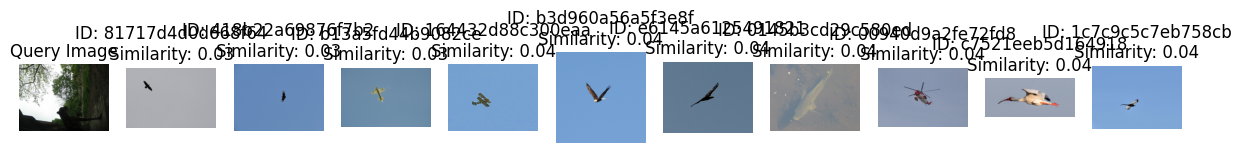

In [34]:
img = cv2.imread(imgs[0])
with open("./bowv/img_hist.json") as f:
    dataset = json.load(f)
dataset_hist = []
for data in dataset:
    dataset_hist.append({
        "ID": data["ID"],
        "Histogram": dict_to_vector(data["Histogram"])
    })
similarities = caculate_similarity(img,dataset_hist)
show_images(img,similarities,10)